<a href="https://colab.research.google.com/github/sitisolikahyosikarinda/DATMIN/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Nama : Siti Solikah Yosi Karinda
 NIM  : 2209116029

# Sistem Informasi A 2022

# **Analisa Resiko Kredit dalam Penyaluran Kredit Bank**

In [72]:
import pandas as pd

In [73]:
import numpy as np
import plotly.express as px

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
from scipy import stats



**Library untuk Splitting Data**

In [76]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [77]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

##**BUSINES UNDERSTANDING**

#Business Objective

Tujuan permodelan dataset ini adalah untuk memprediksi kredit yang diberikan kepada pemohon memberi keuntungan atau kerugian bagi lembaga pemberi pinjaman.


#Assess Situation

Situasi bisnins yang mendasari analisis ini adalah bagaimana tepatnya kredit diberikan.

#Data Mining Goals

Tujuan data mining pada dataset ini adalah memprediksi pemberi pinjaman bagaimana tepatnya kredit diberikan untuk berbagai tujuan.

#Project Plan

Rencana proyek untuk menganalisis dataset dengan pengumpulan data dari sumber yang tersedia. setelah itu data dijelaskan dan di identifikasi.

##**DATA UNDERSTANDING**

#**Collect Initial Data**

Sumber dari pemodelan data yang saya ambil berasal dari kaggle dengan judul "Credit Risk Analysis for extending Bank Loans" https://www.kaggle.com/datasets/atulmittal199174/credit-risk-analysis-for-extending-bank-loans

In [79]:
df = pd.read_csv("/content/Data Cleaned bank.csv")

In [80]:
df

,Unnamed: 0,age,ed,employ,income,debtinc,default,AgeCategory
0,0,41,3,17,176,9.3,1.0,0
1,1,27,1,10,31,17.3,0.0,1
2,2,40,1,15,55,5.5,0.0,0
3,3,41,1,15,120,2.9,0.0,0
4,4,24,2,2,28,17.3,1.0,1
...,...,...,...,...,...,...,...,...
845,845,34,1,12,32,2.7,NaN,2
846,846,32,2,12,116,5.7,NaN,2
847,847,48,1,13,38,10.8,NaN,0
848,848,35,2,1,24,7.8,NaN,2


#**Describe Data**

#Informasi Dasar

In [81]:
df.shape

(850, 8)

Pada dataset "Analisa Resiko Kredit dalam Penyaluran Kredit Bank" ini memiliki 1150 baris dan 9 kolom

#Informasi Lanjutan

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   850 non-null    int64  
 1   age          850 non-null    int64  
 2   ed           850 non-null    int64  
 3   employ       850 non-null    int64  
 4   income       850 non-null    int64  
 5   debtinc      850 non-null    float64
 6   default      700 non-null    float64
 7   AgeCategory  850 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 53.2 KB


In [83]:
df.columns

Index(['Unnamed: 0', 'age', 'ed', 'employ', 'income', 'debtinc', 'default',
       'AgeCategory'],
      dtype='object')

Pada dataset ini terdapat 9 kolom


1. Kolom "**age**" adalah kolom yang menjelaskan *** umur***  customer dengan tipe data int64

2. Kolom "**ed**" adalah kolom yang menjelaskan ***tingkat pendidikan*** customer dengan tipe data int64

3. Kolom "**employ**" adalah kolom yang menjelaskan ***pengalaman kerja ***customer dengan tipe data int64

4. Kolom "**address**" adalah kolom yang menjelaskan ***alamat*** customer dengan tipe data int64


5. Kolom "**income**" adalah kolom yang menjelaskan ***pendapatan tahunan*** customer dengan tipe data int64


6. Kolom "**debtince**" adalah kolom yang menjelaskan ***Rasio Hutang terhadap Pendapatan*** customer dengan tipe data float46


7. Kolom "**creddebt**" adalah kolom yang menjelaskan ***Rasio Kredit terhadap Hutang ***customer dengan tipe data float46

8. Kolom "**othdebt**" adalah kolom yang menjelaskan ***Hutang lainnya yang dimiliki*** customer dengan tipe data float46


9. Kolom "**default**" adalah kolom yang menjelaskan customer yang pernah ***gagal bayar di masa lalu*** (1= gagal bayar, 0=Tidak pernah gagal bayar)dengan tipe data float46



#Informasi Deskriptif

In [84]:
df.describe()

,Unnamed: 0,age,ed,employ,income,debtinc,default,AgeCategory
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,35.029412,1.710588,8.565882,46.675294,10.171647,0.261429,1.115294
std,245.51816,8.041432,0.927784,6.777884,38.543054,6.719441,0.439727,0.828455
min,0.00000,20.000000,1.000000,0.000000,13.000000,0.100000,0.000000,0.000000
25%,212.25000,29.000000,1.000000,3.000000,24.000000,5.100000,0.000000,0.000000
50%,424.50000,34.000000,1.000000,7.000000,35.000000,8.700000,0.000000,1.000000
75%,636.75000,41.000000,2.000000,13.000000,55.750000,13.800000,1.000000,2.000000
max,849.00000,56.000000,5.000000,33.000000,446.000000,41.300000,1.000000,2.000000




1. gae: Kolom ini memiliki rata-rata 35,24, standar deviasi (std) 8,49, dan berkisar dari minimum 20 hingga maksimum 56. Terdapat 1150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 29.000000, 50% (Quartel 2)titik data kurang dari atau sama dengan 35.000000 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 41.000000.

2. ed: Kolom ini memiliki mean 56, dengan standar deviasi (std) 1,00. Ini memiliki 1.150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 1.000000, 50% (Quartel 2)titik data kurang dari atau sama dengan 1.000000 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 2.000000.

3. employ: Kolom ini memiliki rata-rata 8,78, standar deviasi (std) 6,91, dan berkisar dari minimum 0 hingga maksimum 15. Terdapat 1150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 3.000000, 50% (Quartel 2)titik data kurang dari atau sama dengan 7.000000 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 13.000000.

4. address: Kolom ini memiliki rata-rata 2,00, deviasi standar (std) 13,00, dan berkisar dari minimum 0 hingga maksimum 22. Terdapat 1150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 3.000000, 50% (Quartel 2)titik data kurang dari atau sama dengan 7.000000 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 12.000000.

5. income: Kolom ini memiliki rata-rata 13, deviasi standar (std) 3,00, dan berkisar dari minimum 5 hingga maksimum 24. Terdapat 1.150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 24.000000, 50% (Quartel 2)titik data kurang dari atau sama dengan 36.000000 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 56.000000.

6. debtinc: Kolom ini memiliki rata-rata 6,58, deviasi standar (std) 0,10, dan berkisar dari minimum 5,2 hingga maksimum 8,75. Terdapat 1.150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 5.200000, 50% (Quartel 2)titik data kurang dari atau sama dengan 8.750000 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 13.600000.

7. creaddbt: Kolom ini memiliki rata-rata 13,60, deviasi standar (std) 1,61, dan berkisar dari minimum 0,01 hingga maksimum 35,19. Terdapat 1.150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 0.4, 50% (Quartel 2)titik data kurang dari atau sama dengan 0.9 dan 75 % (Ruartel 3)  titik data kurang dari atau sama dengan 0.9.

8. othdebt: Kolom ini memiliki rata-rata 1,05, deviasi standar (std) 2,04, dan berkisar dari minimum 0 hingga maksimum 35,20. Terdapat 1.150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 1.047996, 50% (Quartel 2)titik data kurang dari atau sama dengan 0.38053 dan 75 % (Ruartel 3) titik data kurang dari atau sama dengan 3.8.

9. default: Kolom ini memiliki rata-rata 1,05, deviasi standar (std) 0,00, dan berkisar dari minimum 1 hingga maksimum 1. Terdapat 1.150 titik data, dengan 25% (Quartel 1) titik data kurang dari atau samadengan 0, 50% (Quartel 2)titik data kurang dari atau sama dengan 0 dan 75 % (Ruartel 3) titik data kurang dari atau sama dengan 1.


##**Exploratory Data Analysis**

In [85]:
df = pd.read_csv('https://raw.githubusercontent.com/sitisolikahyosikarinda/DATMIN/main/bankloans.csv')

In [86]:
age_counts = df['age'].value_counts()
age_counts

35    66
29    65
31    54
39    49
37    49
34    48
38    44
26    44
33    43
27    43
30    42
40    42
24    42
36    41
32    40
41    40
28    40
25    35
47    34
43    32
45    31
46    28
23    27
48    27
44    27
22    18
50    17
21    16
42    16
52    13
53     9
51     9
49     7
54     4
56     4
55     2
20     2
Name: age, dtype: int64

In [87]:
df.groupby('age').mean().head()

,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,,,,,,,,
20,2.000000,2.000000,0.500000,15.500000,6.000000,0.122388,0.752112,0.500000
21,2.062500,1.062500,0.875000,23.875000,11.793750,0.899152,2.186410,0.300000
22,2.222222,1.055556,1.388889,20.333333,12.083333,0.785817,1.605238,0.416667
23,1.629630,2.629630,2.296296,24.074074,9.218519,0.676591,1.451297,0.555556
24,1.309524,2.904762,2.095238,21.880952,8.504762,0.632549,1.115403,0.500000


Dapat dilihat dari data tabel rata rata peminjam kredit berkisar di umur 20-24 tahun

<Axes: xlabel='age', ylabel='Count'>

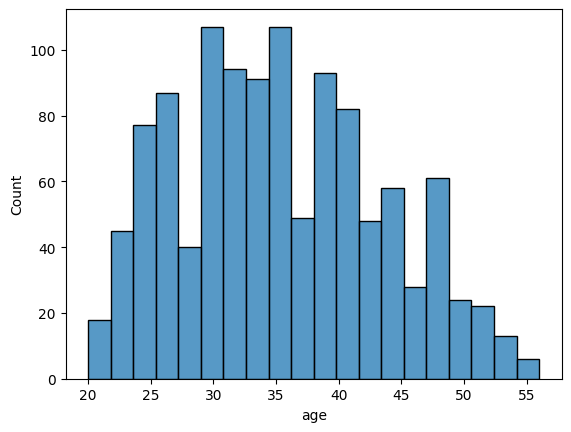

In [88]:
sns.histplot(df['age'].dropna(), bins=20)

Grafik batang diatas menunjukan umur nasabah peminjam kredit.

In [89]:
ed_counts = df['default'].value_counts()
ed_counts

0.0    517
1.0    183
Name: default, dtype: int64

<Axes: ylabel='default'>

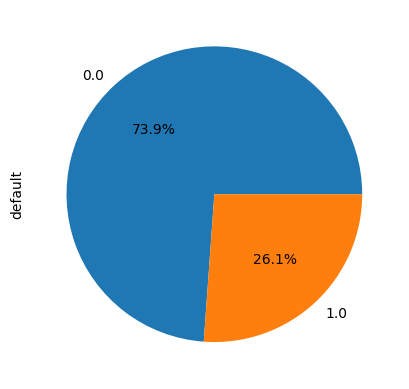

In [90]:
umur_counts = df['default'].value_counts()
umur_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360)

Grafik lingkaran diatas menunjukan presentase customer yang pernah gagal bayar di masa lalu (default). Dengan ini dapat di simpulkan sebanyak 26.1% customer gagal bayar kredit dimasalalu

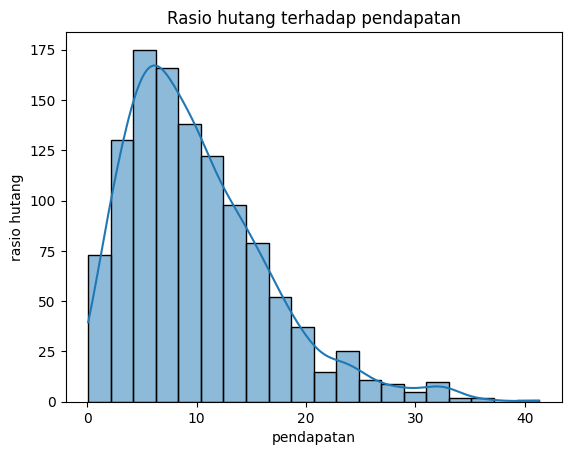

In [91]:
sns.histplot(df['debtinc'].dropna(), bins=20, kde=True)
plt.title('Rasio hutang terhadap pendapatan')
plt.xlabel("pendapatan")
plt.ylabel('rasio hutang')
plt.show()

Bar chart diatas menunjukkan Rasio Hutang terhadap Pendapatan tidak normal




<ipython-input-92-065c5dd8c987>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'jumlah nasabah')

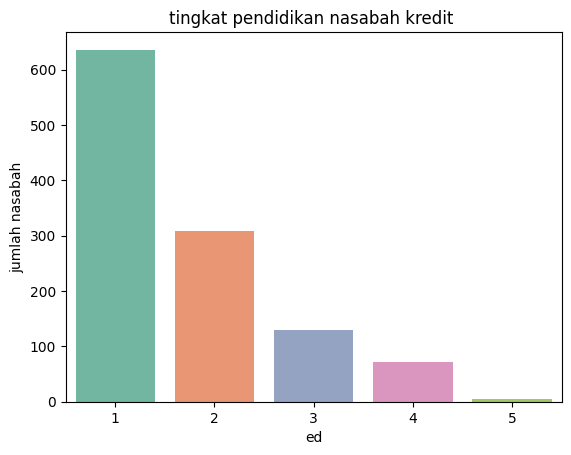

In [92]:
sns.countplot(x='ed', data=df, palette='Set2')
plt.title('tingkat pendidikan nasabah kredit ')
plt.xlabel('ed')
plt.ylabel('jumlah nasabah')

Pada grafik batang diatas dapat dilihat nasabah kredit dengan tingkat pendidikan 1 (pertama) yang paling banyak.

Dalam beberapa visualisasi yang ditampilkan dapat ditarik kesimpulan bahwa peminjam kredit rata-rata berumur 20-24 tahun dengan tingkat pendidikan 1 (pertama) dengan presentase gagal bayar di masalalu sebesar 26.1% dimana Rasio hutang terhadap pendapatan tidak normal.

##**Verify Data Quality**

#Missing Values

In [93]:
pd.DataFrame(df.isna().sum() / len(df) *100, columns=['Null Ratio %'])

,Null Ratio %
age,0.000000
ed,0.000000
employ,0.000000
address,0.000000
income,0.000000
debtinc,0.000000
creddebt,0.000000
othdebt,0.000000
default,39.130435


Pada data ini hanya kolom default yang memiliki data kosong

#Outliers Values

In [94]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})


In [95]:
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)


In [96]:
display(results_df)

Kolom,Persentase Outliers
age,0.000000
ed,6.608696
employ,1.565217
address,2.521739
income,7.130435
debtinc,2.782609
creddebt,8.608696
othdebt,7.652174
default,0.000000


Ada 4 data yang tergolong outliers dimana kolom 0 memiliki 1% outliers kolom 1 memiliki 2% outliers dan kolom 2 memiliki 1% outliers

#Duplicated Values

In [97]:
df[df.duplicated()]

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
850,36,1,16,13,32,10.9,0.544128,2.943872,NaN
851,50,1,6,27,21,12.9,1.316574,1.392426,NaN
852,40,1,9,9,33,17.0,4.880700,0.729300,NaN
853,31,1,5,7,23,2.0,0.046000,0.414000,NaN
854,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


Berdasarkan hasil analisis diatas dapat kita tarik kesimpulan bahwa data tersebut memiliki kualitas yang cukup baik dikarenakan hanya ada satu kolom dengan data kosong dan sedikit data yang terduplikasi.

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase, yang  bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [98]:
print((df.isna().sum() / len(df)) * 100)

age          0.000000
ed           0.000000
employ       0.000000
address      0.000000
income       0.000000
debtinc      0.000000
creddebt     0.000000
othdebt      0.000000
default     39.130435
dtype: float64


nilai kosong pada default

In [99]:
df[df['default'].isnull()]

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,NaN
1146,32,2,12,11,116,5.7,4.026708,2.585292,NaN
1147,48,1,13,11,38,10.8,0.722304,3.381696,NaN
1148,35,2,1,11,24,7.8,0.417456,1.454544,NaN


#####**Imputasi Missing Values**

ntuk kolom default, perlu kita lakukan imputasi jumlah missing valuesnya < 70%.

In [100]:
df['default'].dropna().describe()

count    700.000000
mean       0.261429
std        0.439727
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: default, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom default untuk imputasi nilai kosong tersebut

In [101]:
df['default'] = df['default'].fillna(df['default'].dropna().mean())

#####**Pengecekkan Ulang**

In [102]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
age,0.0
ed,0.0
employ,0.0
address,0.0
income,0.0
debtinc,0.0
creddebt,0.0
othdebt,0.0
default,0.0


###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [103]:
df[df.duplicated()]

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
850,36,1,16,13,32,10.9,0.544128,2.943872,0.261429
851,50,1,6,27,21,12.9,1.316574,1.392426,0.261429
852,40,1,9,9,33,17.0,4.880700,0.729300,0.261429
853,31,1,5,7,23,2.0,0.046000,0.414000,0.261429
854,29,1,4,0,24,7.8,0.866736,1.005264,0.261429
...,...,...,...,...,...,...,...,...,...
1145,34,1,12,15,32,2.7,0.239328,0.624672,0.261429
1146,32,2,12,11,116,5.7,4.026708,2.585292,0.261429
1147,48,1,13,11,38,10.8,0.722304,3.381696,0.261429
1148,35,2,1,11,24,7.8,0.417456,1.454544,0.261429


#####**Hapus Nilai Duplikat**

In [104]:
df = df.drop_duplicates()

menghapus nilai duplikat

In [105]:
df[df.duplicated()]

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default


###**Penanganan Outliers**

In [106]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Menampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.000000
ed,6.352941
employ,1.176471
address,2.235294
income,6.235294
debtinc,2.470588
creddebt,8.117647
othdebt,7.176471
default,21.529412


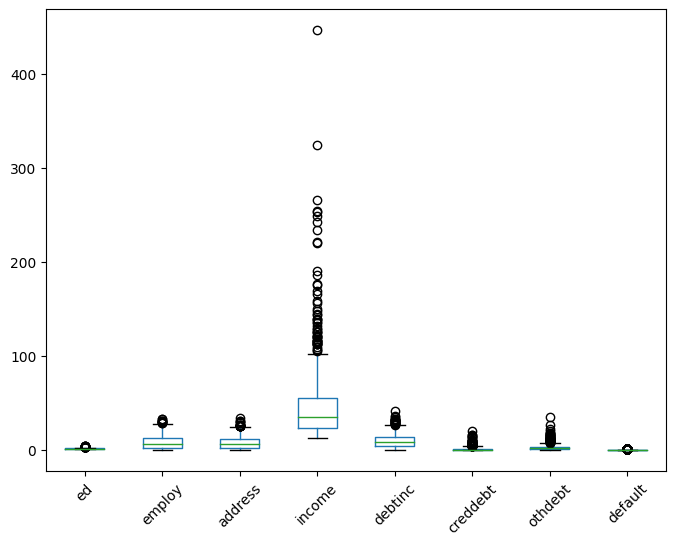

In [107]:
boxplot = df.drop('age', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [108]:
def categorize_agee(age):
  if age < 35:
    return 'Mampu'
  elif 35 <= age < 60:
    return 'Mapan'
  else:
    return 'Lansia'
df['AgeCategory'] = df['age'].apply(categorize_agee)


###**Pengecekkan Hasil**

In [109]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,AgeCategory
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,Mapan
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,Mampu
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,Mapan
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,Mapan
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,Mampu


menambahkan fitur baru yaitu "AgeCategory" untuk mengelompokan golongan umur.

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [110]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [111]:
df = df.drop([ 'address', 'othdebt', 'creddebt' ], axis=1)

Kolom "address", "othdebt", dan "creddebt" dirasa kurang relevan karena

***Kolom "address" (alamat)***
Kolom ini tidak memberikan informasi langsung tentang kemampuan kredit customer.

Data alamat mungkin sulit diverifikasi dan dianalisis.


***Kolom "othdebt" (Hutang lainnya yang dimiliki)***
Kolom ini sudah terwakili oleh kolom "debtince" (Rasio Hutang terhadap Pendapatan) yang lebih informatif.

***Kolom "creddebt" (Rasio Kredit terhadap Hutang)***
Kolom ini memiliki kesamaan dengan "debtince"



###**Pengecekkan Hasil**

In [112]:
df.head()

,age,ed,employ,income,debtinc,default,AgeCategory
0,41,3,17,176,9.3,1.0,Mapan
1,27,1,10,31,17.3,0.0,Mampu
2,40,1,15,55,5.5,0.0,Mapan
3,41,1,15,120,2.9,0.0,Mapan
4,24,2,2,28,17.3,1.0,Mampu


#**Data Transformation**

###**Mapping**

In [113]:
df['AgeCategory'] = df['AgeCategory'].map({'Mapan': 0, 'Mampu': 1}).astype(int)

In [114]:
df

,age,ed,employ,income,debtinc,default,AgeCategory
0,41,3,17,176,9.3,1.000000,0
1,27,1,10,31,17.3,0.000000,1
2,40,1,15,55,5.5,0.000000,0
3,41,1,15,120,2.9,0.000000,0
4,24,2,2,28,17.3,1.000000,1
...,...,...,...,...,...,...,...
845,34,1,12,32,2.7,0.261429,1
846,32,2,12,116,5.7,0.261429,1
847,48,1,13,38,10.8,0.261429,0
848,35,2,1,24,7.8,0.261429,0


mengubah kolom yang memiliki data non numerik menjadi numerik, pada kasus ini saya mengubah tipe data dari kolom "AgeCategory" menjadi numerik

###**Encoding**

In [115]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [116]:
df.head()

,age,ed,employ,income,debtinc,default,AgeCategory
0,41,3,17,176,9.3,1.0,0
1,27,1,10,31,17.3,0.0,1
2,40,1,15,55,5.5,0.0,0
3,41,1,15,120,2.9,0.0,0
4,24,2,2,28,17.3,1.0,1


mengecek hasil encoding yang telah digunakan


In [172]:
df.to_csv("Data Evaluation.csv")

In [118]:
df.head()

,age,ed,employ,income,debtinc,default,AgeCategory
0,41,3,17,176,9.3,1.0,0
1,27,1,10,31,17.3,0.0,1
2,40,1,15,55,5.5,0.0,0
3,41,1,15,120,2.9,0.0,0
4,24,2,2,28,17.3,1.0,1


#**Modelling Associate**

Saya memilih untuk menggunakan permodelan Associate karena cocok dengan dataset saya dimana data yang ada dikelompokkan

###**Pre-Processing**

#####**Adjusment**

In [146]:
x_final = df.drop('debtinc', axis=1)

In [148]:
x_final

,age,ed,employ,income,debtinc,default,AgeCategory
0,41,3,17,176,9.3,1.000000,0
1,27,1,10,31,17.3,0.000000,1
2,40,1,15,55,5.5,0.000000,0
3,41,1,15,120,2.9,0.000000,0
4,24,2,2,28,17.3,1.000000,1
...,...,...,...,...,...,...,...
845,34,1,12,32,2.7,0.261429,1
846,32,2,12,116,5.7,0.261429,1
847,48,1,13,38,10.8,0.261429,0
848,35,2,1,24,7.8,0.261429,0


#####**Normalisasi Data**

In [120]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

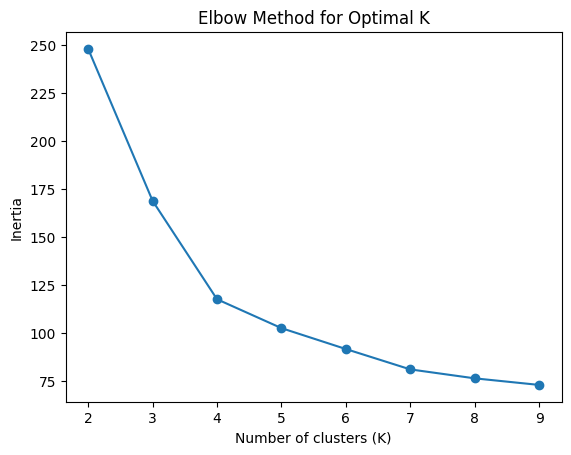

In [121]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Pada grafik, terdapat kurva yang menunjukkan nilai inertia untuk setiap nilai k. Kurva ini menunjukkan siku (elbow) di sekitar k=3.
Berdasarkan grafik Elbow Method, nilai k yang optimal untuk model clustering adalah 3. Hal ini menunjukkan bahwa data dapat dikelompokkan secara optimal menjadi 3 cluster.

###**Build Model**

#####**K-Means**

Model KMeans ini akan mengelompokkan data menjadi  cluster.

In [122]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

#####**Hierarchical Clustering**

Kode ini membuat objek model hc untuk clustering data dengan algoritma AgglomerativeClustering. Model ini akan menghasilkan 3 cluster dengan menggunakan jarak Euclidean dan Ward's minimum variance method.

In [123]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

###**Begins and Compare Clusters**

membandingkan hasil pengelompokkan dari kedua model yang berbeda

In [124]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [125]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [126]:
combined_data_assoc.head()

,age,ed,employ,income,debtinc,default,AgeCategory,kmeans_cluster,hierarchy_cluster
0,41,3,17,176,9.3,1.0,0,2,0
1,27,1,10,31,17.3,0.0,1,1,2
2,40,1,15,55,5.5,0.0,0,0,1
3,41,1,15,120,2.9,0.0,0,0,1
4,24,2,2,28,17.3,1.0,1,2,0


Penggabungan data berfungsi untuk melihat data asli bersamaan dengan label klaster dari dua algoritma clustering yang berbeda.
Hal ini memungkinkan untuk membandingkan dan menganalisis hasil clustering dari kedua algoritma.

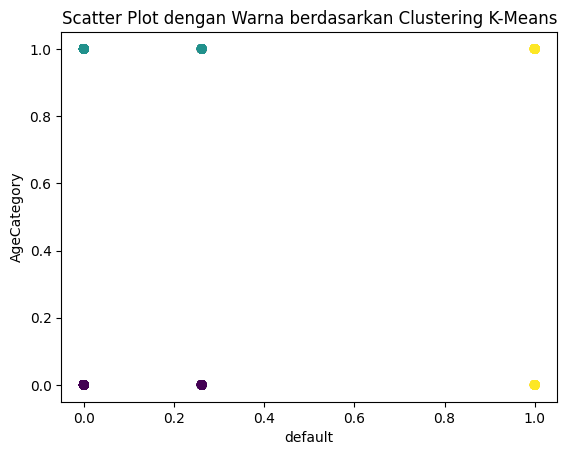

In [127]:
plt.scatter(x_final['default'], x_final['AgeCategory'], c=kmeans_col['kmeans_cluster'], cmap='viridis')

plt.title('Scatter Plot dengan Warna berdasarkan Clustering K-Means')
plt.xlabel('default')
plt.ylabel('AgeCategory')

plt.show()


Visualisasi menunjukkan bahwa terdapat tiga kelompok berbeda dalam dataset, yang diidentifikasi oleh algoritma K-Means. Kelompok-kelompok ini memiliki distribusi nilai default dan AgeCategory yang berbeda


Ada tiga klaster K-Means yang berbeda, ditunjukkan dengan tiga warna berbeda (biru, hijau, dan merah).

Distribusi data di setiap klaster berbeda.

*Klaster biru berisi individu dengan nilai default yang lebih rendah dan AgeCategory yang lebih muda.

*Klaster hijau berisi individu dengan nilai default yang lebih tinggi dan AgeCategory yang lebih tua.

*Klaster merah berisi individu dengan nilai default dan AgeCategory yang bervariasi.

####EVALUASI

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [129]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.516775,831.682779,0.881005
Agglomerative Clustering Score,0.516775,831.682779,0.881005


Silhouette Score tinggi menunjukkan data terdistribusi dengan baik dalam klusternya


Calinski-Harabasz Score KMeans lebih tinggi daripada Agglomerative Clustering, menunjukkan pemisahan kluster KMeans lebih baik.


Davies-Bouldin Score KMeans lebih kecil daripada Agglomerative Clustering, menunjukkan pemisahan kluster KMeans lebih baik.



KMeans memiliki performa clustering yang lebih baik dibandingkan Agglomerative Clustering.

##**Review Process**

###**Cross Validation**

In [130]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score

# Inisialisasi model klastering
kmeans = KMeans(n_clusters=3)

# Data yang digunakan untuk klastering

data_for_clustering = x_final

# Lakukan validasi silang berulang untuk klastering
num_repeats = 5
cv_scores = []
for _ in range(num_repeats):
    scores = silhouette_score(data_for_clustering, kmeans.fit_predict(data_for_clustering))
    cv_scores.append(scores)

# Tampilkan hasil validasi silang
print("Cross-Validation Scores (Silhouette Score) for K-Means Clustering:")
print(cv_scores)


plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cross-Validation Scores (Silhouette Score) for K-Means Clustering:
[0.5631594518242675, 0.5631594518242675, 0.5631594518242675, 0.5631594518242675, 0.5631594518242675]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



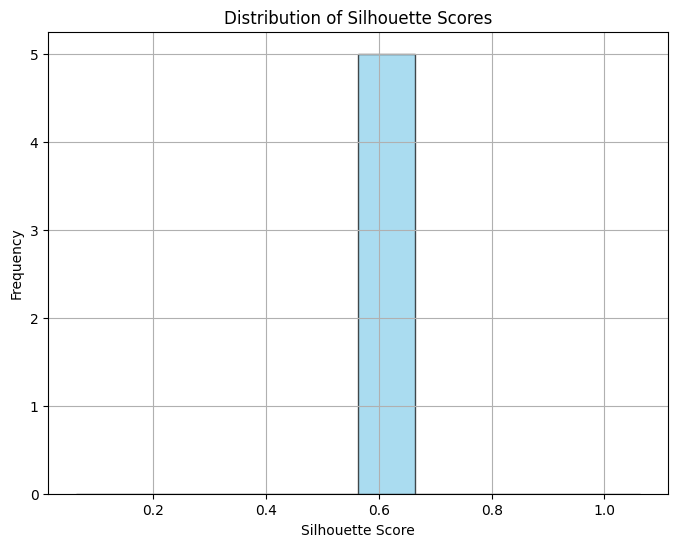

In [131]:
import matplotlib.pyplot as plt

# Tampilkan histogram dari hasil validasi silang
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Silhouette Scores')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**[0.5652784497308166, 0.5631594518242675, 0.5658308053451725, 0.5631594518242675, 0.5631594518242675]**: Baris ini menampilkan **nilai Silhouette Score untuk setiap sub-dataset** yang digunakan pada validasi silang. Semakin tinggi nilai Silhouette Score, semakin baik pemisahan antar cluster.






**Mean Score: 0.5641175221097583**: Baris ini menampilkan **nilai rata-rata Silhouette Score**  dari semua sub-dataset pada validasi silang. Nilai ini memberikan gambaran performa clustering secara keseluruhan.

Heararki

In [132]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score

# Inisialisasi model klastering hierarkis
agg_clustering = AgglomerativeClustering(n_clusters=3)
# Data yang digunakan untuk klastering
data_for_clustering = x_final

# Lakukan validasi silang berulang untuk klastering
num_repeats = 5
cv_scores = []
for _ in range(num_repeats):
    scores = silhouette_score(data_for_clustering, agg_clustering.fit_predict(data_for_clustering))
    cv_scores.append(scores)

# Tampilkan hasil validasi silang
print("Cross-Validation Scores (Silhouette Score) for Hierarchical Clustering:")
print(cv_scores)


Cross-Validation Scores (Silhouette Score) for Hierarchical Clustering:
[0.542103957768467, 0.542103957768467, 0.542103957768467, 0.542103957768467, 0.542103957768467]


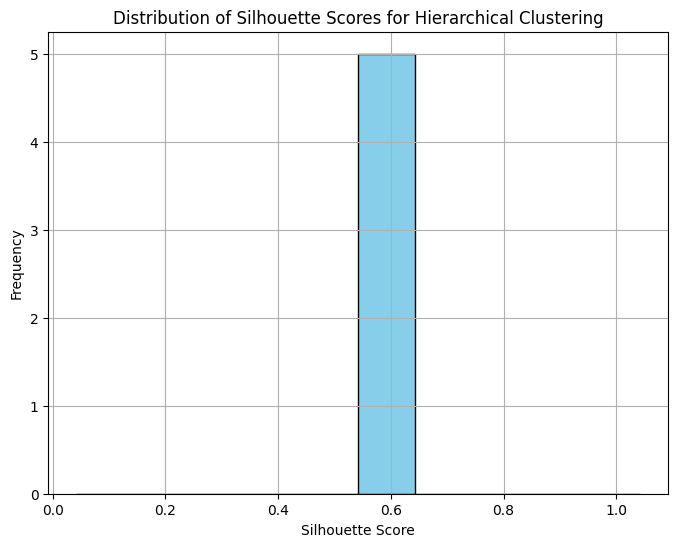

In [133]:
import matplotlib.pyplot as plt

# Visualisasi hasil cross-validation
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.title('Distribution of Silhouette Scores for Hierarchical Clustering')
plt.grid(True)
plt.show()


Nilai skor siluet berkisar dari -1 hingga 1. Semakin dekat nilai skor siluet ke 1, semakin baik klasternya. Nilai 1 menunjukkan bahwa instans dalam sebuah klaster berada sangat dekat satu sama lain dan jauh dari klaster lain. Nilai 0 menunjukkan tumpang tindih antara klaster, sedangkan nilai negatif menunjukkan bahwa instans mungkin ditempatkan di klaster yang salah.

Dalam contoh ini, nilai skor siluet yang diberikan adalah sekitar 0.54 untuk setiap fold dalam cross-validation. Ini menunjukkan bahwa klaster yang dihasilkan oleh model klastering hirarkis memiliki kualitas yang cukup baik, karena nilai siluet yang lebih dari 0.5 dianggap baik

###**Feature Selection**

K-Means

In [134]:
from sklearn.cluster import KMeans
import pandas as pd

# Inisialisasi model klastering
kmeans = KMeans(n_clusters=3)

# Melakukan klastering pada data
cluster_labels = kmeans.fit_predict(data_for_clustering)

# Menambahkan label kluster ke dalam DataFrame
data_with_clusters = pd.DataFrame(data_for_clustering, columns=x_final.columns)
data_with_clusters['Cluster'] = cluster_labels

# Menghitung rata-rata nilai fitur untuk setiap kluster
cluster_means = data_with_clusters.groupby('Cluster').mean()

# Mendefinisikan threshold
threshold = 0.5

# Memilih fitur dengan perbedaan nilai rata-rata yang signifikan antara kluster
significant_features = []
for feature in cluster_means.columns:
    cluster_diff = cluster_means[feature].max() - cluster_means[feature].min()
    if cluster_diff > threshold:
        significant_features.append(feature)

print("Significant Features:")
print(significant_features)



Significant Features:
['age', 'ed', 'employ', 'income', 'debtinc', 'AgeCategory']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



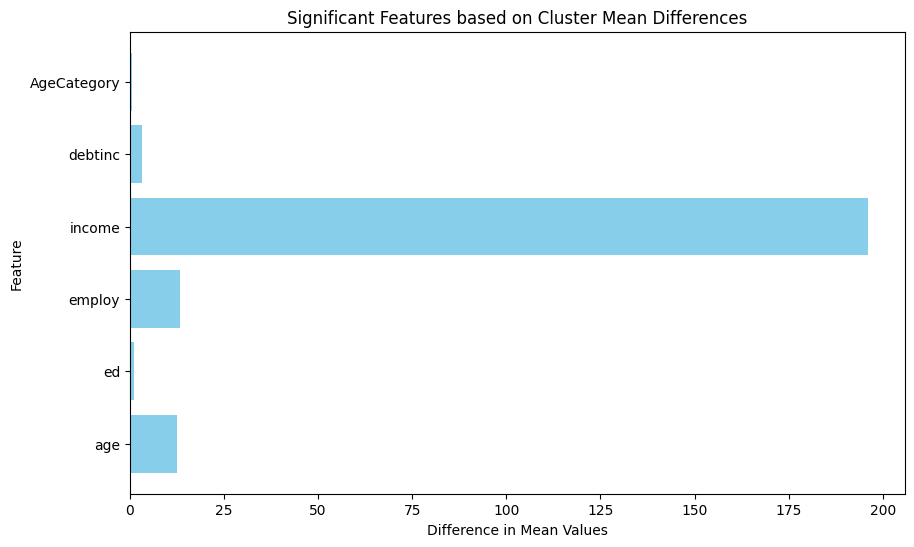

In [135]:
import matplotlib.pyplot as plt

# Visualisasi fitur-fitur signifikan
plt.figure(figsize=(10, 6))
plt.barh(significant_features, [cluster_means[feature].max() - cluster_means[feature].min() for feature in significant_features], color='skyblue')
plt.xlabel('Difference in Mean Values')
plt.ylabel('Feature')
plt.title('Significant Features based on Cluster Mean Differences')
plt.show()


Hearki

In [136]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Inisialisasi model klastering hirarkis
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Melakukan klastering hirarkis pada data
cluster_labels = agg_clustering.fit_predict(data_for_clustering)

# Menambahkan label kluster ke dalam DataFrame
data_with_clusters = pd.DataFrame(data_for_clustering, columns=x_final.columns)
data_with_clusters['Cluster'] = cluster_labels

# Menghitung rata-rata nilai fitur untuk setiap kluster
cluster_means = data_with_clusters.groupby('Cluster').mean()

# Mendefinisikan threshold
threshold = 0.5

# Memilih fitur dengan perbedaan nilai rata-rata yang signifikan antara kluster
significant_features = []
for feature in cluster_means.columns:
    cluster_diff = cluster_means[feature].max() - cluster_means[feature].min()
    if cluster_diff > threshold:
        significant_features.append(feature)

print("Significant Features:")
print(significant_features)


Significant Features:
['age', 'ed', 'employ', 'income', 'debtinc', 'AgeCategory']


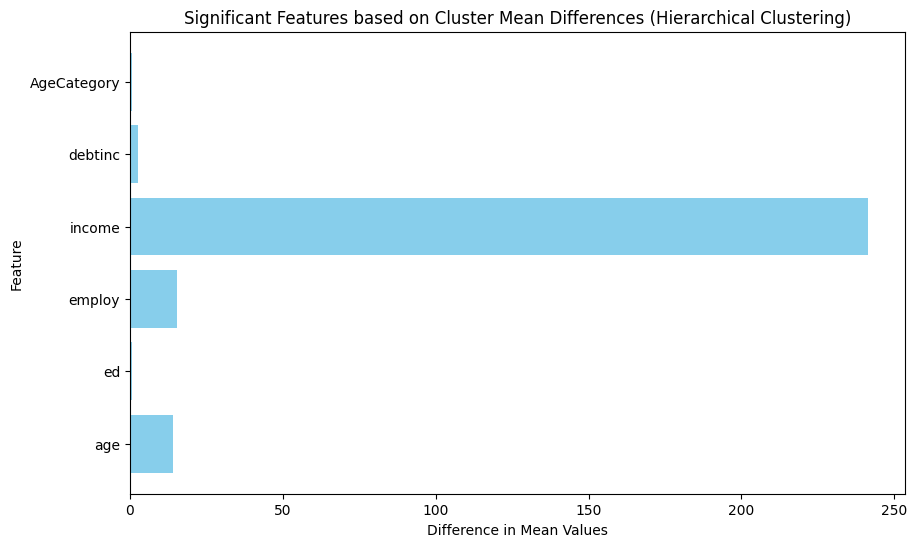

In [137]:
import matplotlib.pyplot as plt

# Visualisasi fitur-fitur signifikan
plt.figure(figsize=(10, 6))
plt.barh(significant_features, [cluster_means[feature].max() - cluster_means[feature].min() for feature in significant_features], color='skyblue')
plt.xlabel('Difference in Mean Values')
plt.ylabel('Feature')
plt.title('Significant Features based on Cluster Mean Differences (Hierarchical Clustering)')
plt.show()


kolom ('age', 'ed', 'employ', 'income', 'debtinc', 'AgeCategory') ini dianggap penting dalam membedakan antara kluster-kluster yang ada.

###**Tuning Hyperparameter**

K-Means

In [141]:
param_grid = {
    'n_clusters': [3, 4, 5, 6],  # Jumlah klaster yang akan dicoba
    'init': ['k-means++', 'random'],  # Metode inisialisasi centroid
    'algorithm': ['lloyd', 'elkan']  # Algoritma yang digunakan
}

# Evaluasi kualitas klastering menggunakan Silhouette Score
best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for algorithm in param_grid['algorithm']:
            kmeans = KMeans(n_clusters=n_clusters, init=init, algorithm=algorithm, random_state=42, n_init='auto')
            labels = kmeans.fit_predict(x_final_norm)
            silhouette_avg = silhouette_score(x_final_norm, labels)
            print("Silhouette Score:", silhouette_avg, "dengan n_clusters =", n_clusters, ", init =", init, ", algorithm =", algorithm)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'init': init, 'algorithm': algorithm}

print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)

Silhouette Score: 0.5077554708661833 dengan n_clusters = 3 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.5077554708661833 dengan n_clusters = 3 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.5167753603069285 dengan n_clusters = 3 , init = random , algorithm = lloyd
Silhouette Score: 0.5167753603069285 dengan n_clusters = 3 , init = random , algorithm = elkan
Silhouette Score: 0.5523191045105889 dengan n_clusters = 4 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.5523191045105889 dengan n_clusters = 4 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.5523191045105889 dengan n_clusters = 4 , init = random , algorithm = lloyd
Silhouette Score: 0.5523191045105889 dengan n_clusters = 4 , init = random , algorithm = elkan
Silhouette Score: 0.4708385278327379 dengan n_clusters = 5 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.4708385278327379 dengan n_clusters = 5 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.426202484069

Silhouette Score: 0.5077554708661833 dengan n_clusters = 3 , init = k-means++ , algorithm = lloyd  nilai sebelum di tunning

Nilai Silhouette Score 0.5523 menunjukkan kualitas clustering yang cukup baik

In [142]:
param_grid = {
    'linkage': ['complete', 'average', 'single'],  # Metode penggabungan
    'metric': ['euclidean', 'manhattan', 'cosine']  # Metode pengukuran jarak
}

best_score = -1
best_params = None
# Evaluasi kualitas klastering menggunakan Silhouette Score

for metric in param_grid['metric']:
  for linkage in param_grid['linkage']:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= metric, linkage= linkage)
    labels = hierarchical_clustering.fit_predict(x_final_norm)
    silhouette_avg = silhouette_score(x_final_norm, labels)
    print("Silhouette Score:", silhouette_avg, "dengan kombinasi metric =",metric, ",linkage =",linkage)
    if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'metric': metric, 'linkage': linkage}

hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= 'euclidean', linkage= 'ward')
labels = hierarchical_clustering.fit_predict(x_final_norm)
silhouette_avg = silhouette_score(x_final_norm, labels)
print('-'*100)
print("\nDi bawah ini merupakan score dari model Hierical clustering yang digunakan sebelumnya pada Modelling Associate")
print("Silhouette Score:", silhouette_avg, "dengan kombinasi metric = eulicidan, linkage = ward")
print('-'*100)
print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)

Silhouette Score: 0.4758743031445029 dengan kombinasi metric = euclidean ,linkage = complete
Silhouette Score: 0.46454914870737724 dengan kombinasi metric = euclidean ,linkage = average
Silhouette Score: 0.4758743031445029 dengan kombinasi metric = euclidean ,linkage = single
Silhouette Score: 0.4758743031445029 dengan kombinasi metric = manhattan ,linkage = complete
Silhouette Score: 0.46454914870737724 dengan kombinasi metric = manhattan ,linkage = average
Silhouette Score: 0.46454914870737724 dengan kombinasi metric = manhattan ,linkage = single
Silhouette Score: 0.4758743031445029 dengan kombinasi metric = cosine ,linkage = complete
Silhouette Score: 0.469114972024682 dengan kombinasi metric = cosine ,linkage = average
Silhouette Score: 0.5077554708661833 dengan kombinasi metric = cosine ,linkage = single
----------------------------------------------------------------------------------------------------

Di bawah ini merupakan score dari model Hierical clustering yang digunakan se

Nilai Silhouette Score 0.502 menunjukkan kualitas clustering yang cukup baik, namun mungkin masih bisa ditingkatkan.

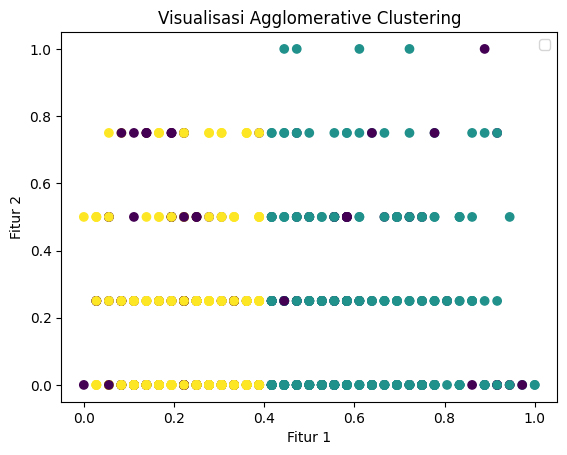

In [143]:
import matplotlib.pyplot as plt

# Asumsikan 'x_final_norm' dan 'labels' didapatkan dari hasil Agglomerative Clustering terbaik Anda

# Scatter plot dengan warna berdasarkan label cluster
plt.scatter(x_final_norm[:, 0], x_final_norm[:, 1], c=labels)  # Sesuaikan indeks kolom sesuai data Anda

# Tambahkan label sumbu
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")

# Tambahkan judul plot
plt.title("Visualisasi Agglomerative Clustering")

# Tambahkan legenda untuk warna kluster (optional)
plt.legend()

# Tampilkan plot
plt.show()


Gambar ini menunjukkan visualisasi hasil K-Means clustering dengan 3 kluster. Silhouette plot menunjukkan bahwa k = 3 adalah pilihan optimal

## Determine Next Step

Clustering

In [162]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

np.random.seed(42)
X = np.random.rand(100, 2)

# Inisialisasi objek KMeans dengan jumlah kluster yang diinginkan
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)

# Melatih model KMeans dengan data
kmeans.fit(x_final_norm)

# Mendapatkan label kluster untuk setiap titik data
kmeans_labels = kmeans.labels_

# Menggabungkan label kluster dengan data asli
x_final = pd.DataFrame(x_final_norm).reset_index(drop=True)
kmeans_col = pd.DataFrame(kmeans_labels, columns=["kmeans_cluster"])
combined_data_assoc_kmeans = pd.concat([x_final, kmeans_col], axis=1)

# Menampilkan contoh data hasil klastering
print("Contoh data hasil klastering dengan K-Means:")
print(combined_data_assoc_kmeans.sample(15))



Contoh data hasil klastering dengan K-Means:
            0     1         2         3         4         5    6  \
746  0.416667  0.50  0.151515  0.039261  0.254854  0.261429  0.0   
322  0.583333  0.00  0.484848  0.083141  0.036408  0.000000  0.0   
101  0.444444  0.00  0.181818  0.030023  0.199029  0.000000  0.0   
439  0.527778  0.25  0.484848  0.092379  0.087379  0.000000  0.0   
58   0.555556  0.50  0.545455  0.200924  0.058252  0.000000  0.0   
792  0.694444  0.00  0.424242  0.076212  0.121359  0.261429  0.0   
323  0.500000  0.00  0.000000  0.023095  0.194175  1.000000  0.0   
130  0.166667  0.75  0.030303  0.032333  0.067961  0.000000  1.0   
411  0.694444  0.00  0.666667  0.180139  0.281553  0.000000  0.0   
385  0.777778  0.00  0.090909  0.032333  0.514563  0.000000  0.0   
840  0.416667  0.25  0.333333  0.113164  0.783981  0.261429  0.0   
44   0.166667  0.00  0.000000  0.002309  0.179612  1.000000  1.0   
49   0.416667  0.00  0.545455  0.066975  0.177184  0.000000  0.0   
846

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



####KESIMPULAN

Dari evaluasi modelling yang telah dilalui, dapat ditarik kesimpulan metode terbaik untuk melakukan klasifikasi adalah metode Kmeans, untuk melakukan klustering K-Means menunjukkan score yang lebih baik daripada metode Hierical Clustering